In [1]:
#import required libraries 
#import OpenCV library
import cv2
#import matplotlib library
import matplotlib.pyplot as plt
#importing time library for speed comparisons of both classifiers
import time 
import numpy as np
%matplotlib inline

In [2]:
# cv2.cvtColor is an OpenCV function to convert images to different color spaces
def convertToRGB(img): 
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [3]:
#load test iamge
test1 = cv2.imread('../../data/test1.jpg')
# cv2.imshow('test1',test1)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
# print(type(test1))
# print(test1)
#convert the test image to gray image as opencv face detector expects gray images 
gray_img = cv2.cvtColor(test1, cv2.COLOR_BGR2GRAY)

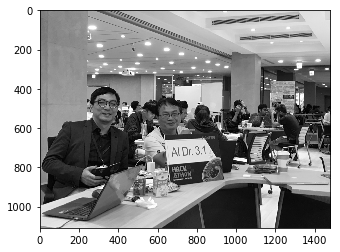

In [4]:
plt.imshow(gray_img, cmap='gray')  
 
# or display the gray image using OpenCV 
# cv2.imshow('Test Imag', gray_img) 
# cv2.waitKey(0) 
# cv2.destroyAllWindows()

# OpenCV's CascadedClassifier 
detectMultiScale（image，scaleFactor，minNeighbors）：這是一個檢測對象的通用函數，在這種情況下，它會檢測面，因為我們調用了face cascade。
如果找到一個面，它將以“Rect（x，y，w，h）”的形式返回所述面的位置列表，如果沒有，則返回“None”。
(1)image：第一個輸入是灰度圖像。因此，請確保圖像為灰度。 
(2)scaleFactor：這個函數補償了當一個面看起來比另一個面更大時發生的錯誤感覺，因為它更接近相機。 
(3)minNeighbors：這是一種使用移動窗口來檢測對象的檢測算法，它通過在聲明找到的面部之前定義在當前對象附近找到多少個對象來實現。

In [5]:
#load cascade classifier training file for haarcascade 
haar_face_cascade = cv2.CascadeClassifier('../../data/haarcascade_frontalface_alt.xml')

In [6]:
faces = haar_face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5);  

#go over list of faces and draw them as rectangles on original colored 
for (x, y, w, h) in faces:     
         cv2.rectangle(test1, (x, y), (x+w, y+h), (0, 255, 0), 2)
        #let's detect multiscale (some images may be closer to camera than others) images 
#print the number of faces found 
print('Faces found: ', len(faces))


Faces found:  2


In [7]:
print(faces)

[[267 415 148 148]
 [600 480 126 126]]


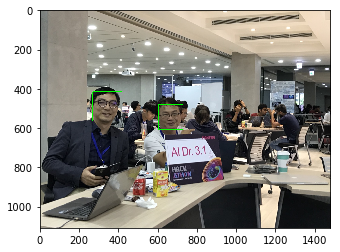

In [8]:
#convert image to RGB and show image 
plt.imshow(convertToRGB(test1))

In [9]:
def detect_faces(f_cascade, colored_img, scaleFactor = 1.1):
 #just making a copy of image passed, so that passed image is not changed 
 img_copy = colored_img.copy()          
 
 #convert the test image to gray image as opencv face detector expects gray images
 gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)          
 
 #let's detect multiscale (some images may be closer to camera than others) images
 faces = f_cascade.detectMultiScale(gray, scaleFactor=scaleFactor, minNeighbors=5);          
 
 #go over list of faces and draw them as rectangles on original colored img
 for (x, y, w, h) in faces:
      cv2.rectangle(img_copy, (x, y), (x+w, y+h), (0, 255, 0), 2)              
 
 return img_copy

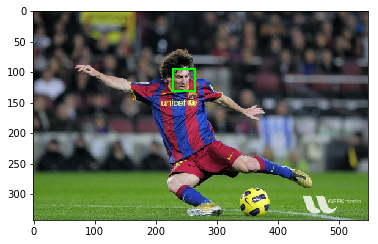

In [10]:
#load another image 
test2 = cv2.imread('../../data/test3.jpg')  
 
#call our function to detect faces 
faces_detected_img = detect_faces(haar_face_cascade, test2)  
 
#convert image to RGB and show image 
plt.imshow(convertToRGB(faces_detected_img))

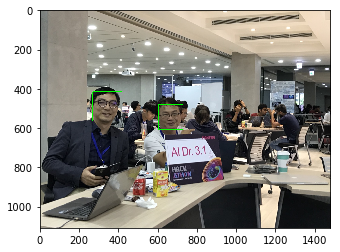

In [25]:
faces_detected_img = detect_faces(haar_face_cascade, test1)  
plt.imshow(convertToRGB(faces_detected_img))

# 作業: 
1. 使用faces = haar_face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5); 
修改 scaleFactor, minNeighbor兩個參數計算 test5.jpg 有幾張臉

2. load cascade classifier training file for haarcascade 
3. load cascade classifier training file for lbpcascade 


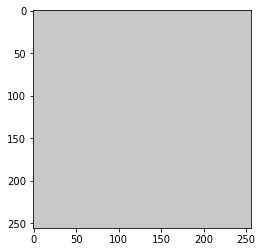

In [11]:
img = np.zeros((256,256,3),np.uint8)
img.fill(200); #將圖片用淺灰色填滿
plt.imshow(img)
plt.show()

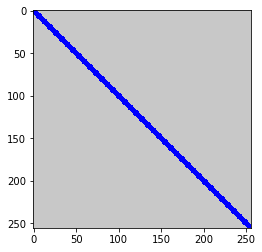

In [16]:
cv2.line(img,(0,0),(255,255),(0,0,255),5); #RGB
plt.imshow(img)

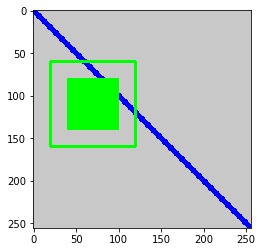

In [17]:
cv2.rectangle(img,(20,60),(120,160),(0,255,0),2)
cv2.rectangle(img,(40,80),(100,140),(0,255,0),-1)
plt.imshow(img)

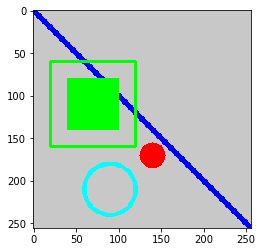

In [18]:
cv2.circle(img,(90,210),30,(0,255,255),3)
cv2.circle(img,(140,170),15,(255,0,0),-1)
plt.imshow(img)

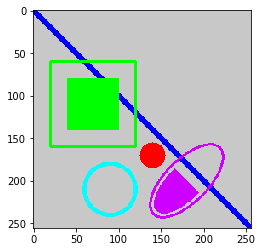

In [20]:
cv2.ellipse(img,(180,200),(25,55),45,0,360,(205,0,255),2)
cv2.ellipse(img,(180,200),(20,50),45,0,180,(205,0,255),-1)
plt.imshow(img)

(4, 2)
(4, 1, 2)
[[[170  55]]

 [[165  75]]

 [[220  80]]

 [[200  60]]]


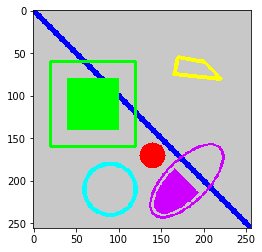

In [22]:
pts = np.array([[170,55],[165,75],[220,80],[200,60]],np.int32)
print(pts.shape)
pts = pts.reshape((-1,1,2))
print(pts.shape)
print(pts)
cv2.polylines(img,[pts],True,(255,255,0),4)
plt.imshow(img)

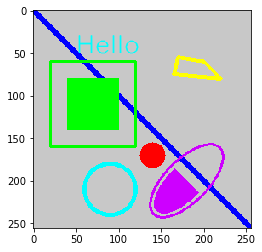

In [24]:
cv2.putText(img,'Hello',(50,50),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,255),1,cv2.LINE_AA)
plt.imshow(img)